<a href="https://colab.research.google.com/github/yegisafari/bigmartsale/blob/main/Machine_Learning_Project_Yeganeh_and_Mahtab_BigMart_Sale_Data_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prediction of Bigmart Sales **

# Yeganeh Safari - Mahtab Mohammadi

#   Project Outline

### 1. Problem Definition:
Define the specific objectives of your sales forecasting project. For example:
- Predict sales for each product and store for the next year as only one year data is available.
- Identify factors affecting sales.

### 2. Dataset:
Gather relevant data for analysis. This may include:
- Historical sales data (daily, weekly, or monthly).
- Product details (type, brand, etc.).
- Store details (location, size, years of operation etc.).
- External factors (holidays, promotions, etc.).

### 3. Data Cleaning and Exploration:
Clean the data by handling missing values, outliers, and inconsistencies. Explore the data to understand its structure and relationships. Use descriptive statistics and visualizations.

### 6. Model Selection:
Choose appropriate forecasting models. Common models for time series forecasting include:
- Machine learning models (Random Forest, XGBoost).

### 7. Model Training:
Split the data into training and validation sets. Train the selected models on the training set and validate their performance on the validation set.

### 8. Hyperparameter Tuning:
Fine-tune model parameters for better performance. This step is crucial for machine learning models.

### 9. Model Evaluation:
Evaluate the models using appropriate metrics:
- Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), etc.

### 10. Forecasting:
Use the trained model to forecast future sales. Update the model periodically with new data.

##  Future Work
### 5. Time Series Analysis:
Since sales data is likely time-dependent, perform time series analysis:
- Explore trends, seasonality, and cycles in the data.
- Decompose time series data into trend, seasonality, and residual components.

### 11. Deployment:
Deploy the forecasting model in a real-world setting. This could involve integrating the model into existing systems or creating a dashboard for end-users.

### 12. Monitoring and Maintenance:
Regularly monitor model performance, and update the model as needed. Sales patterns may change over time, and the model should adapt.


**********************************************************************************************************************


**********************************************************************************************************************


# Data Preprocessing

### Importing the Libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


### Importing the Dataset

In [ ]:
dataset = pd.read_csv('bigmart.csv')
dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
# datatype of attributes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
dataset.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [ ]:
dataset.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# replace reapted values in Item_Fat_Content
dataset.replace({'Item_Fat_Content' : {'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace = True)
dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
# Explore unique values in categorical columns
print("\nUnique values in categorical columns:")
for column in dataset.select_dtypes(include='object').columns:
    print(f"\n{column}: {dataset[column].unique()}")



Unique values in categorical columns:

Item_Identifier: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Item_Fat_Content: ['Low Fat' 'Regular']

Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Outlet_Size: ['Medium' nan 'High' 'Small']

Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']

Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [ ]:

# Handle missing values (example: filling missing values in 'Item_Weight' with the mean)
dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(), inplace=True)


In [ ]:

# Handle categorical variables (example: converting 'Item_Fat_Content' to lowercase)
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].str.lower()


<ipython-input-14-07e67330ca20>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


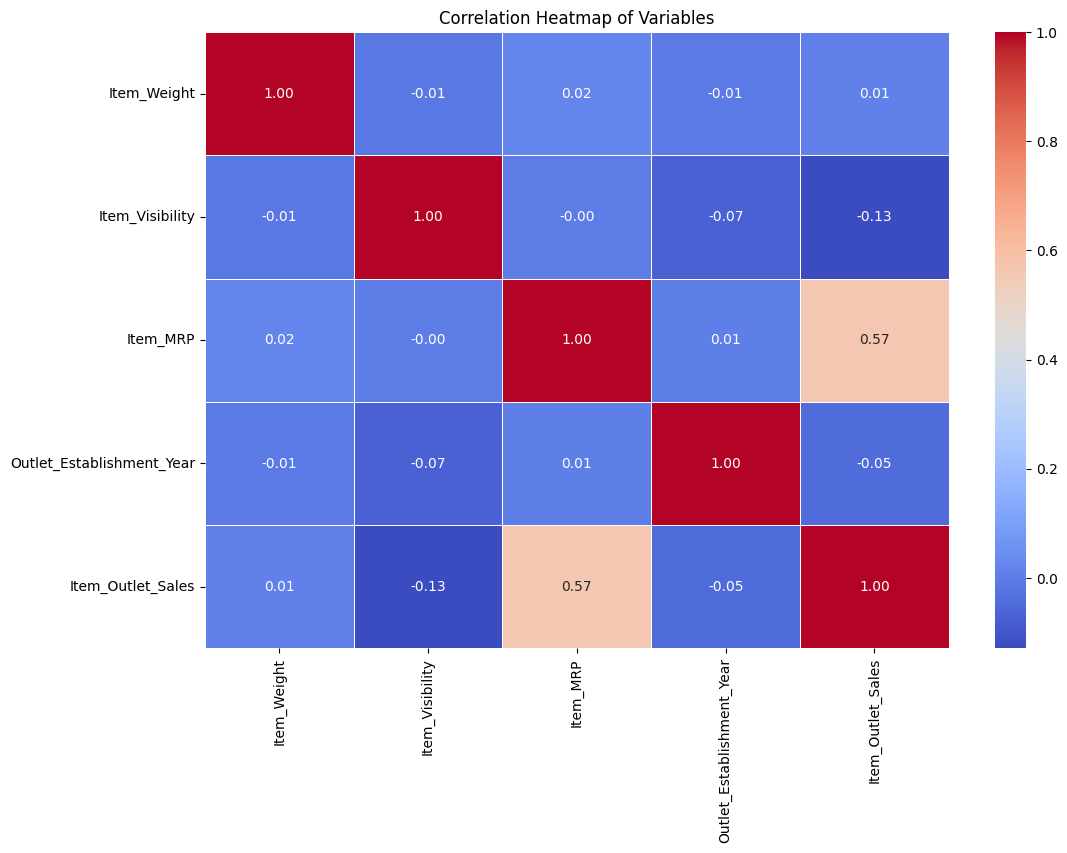

Correlation of sales with other variables:
Item_Weight                  0.011550
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64


In [ ]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Extract the correlation of sales with other variables
sales_correlation = correlation_matrix['Item_Outlet_Sales']

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

# Display the correlation of sales with other variables
print("Correlation of sales with other variables:")
print(sales_correlation)


In [ ]:
# removing the ineffective columns
dataset = dataset.drop(columns = ['Item_Identifier' , 'Outlet_Identifier'], axis = 1)

dataset.shape

(8523, 10)

## Missing Values

In [ ]:
dataset.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# filling the object values with mode and float type with mean
dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(), inplace = True)
dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode().iloc[0])

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

## Outliers

<Axes: >

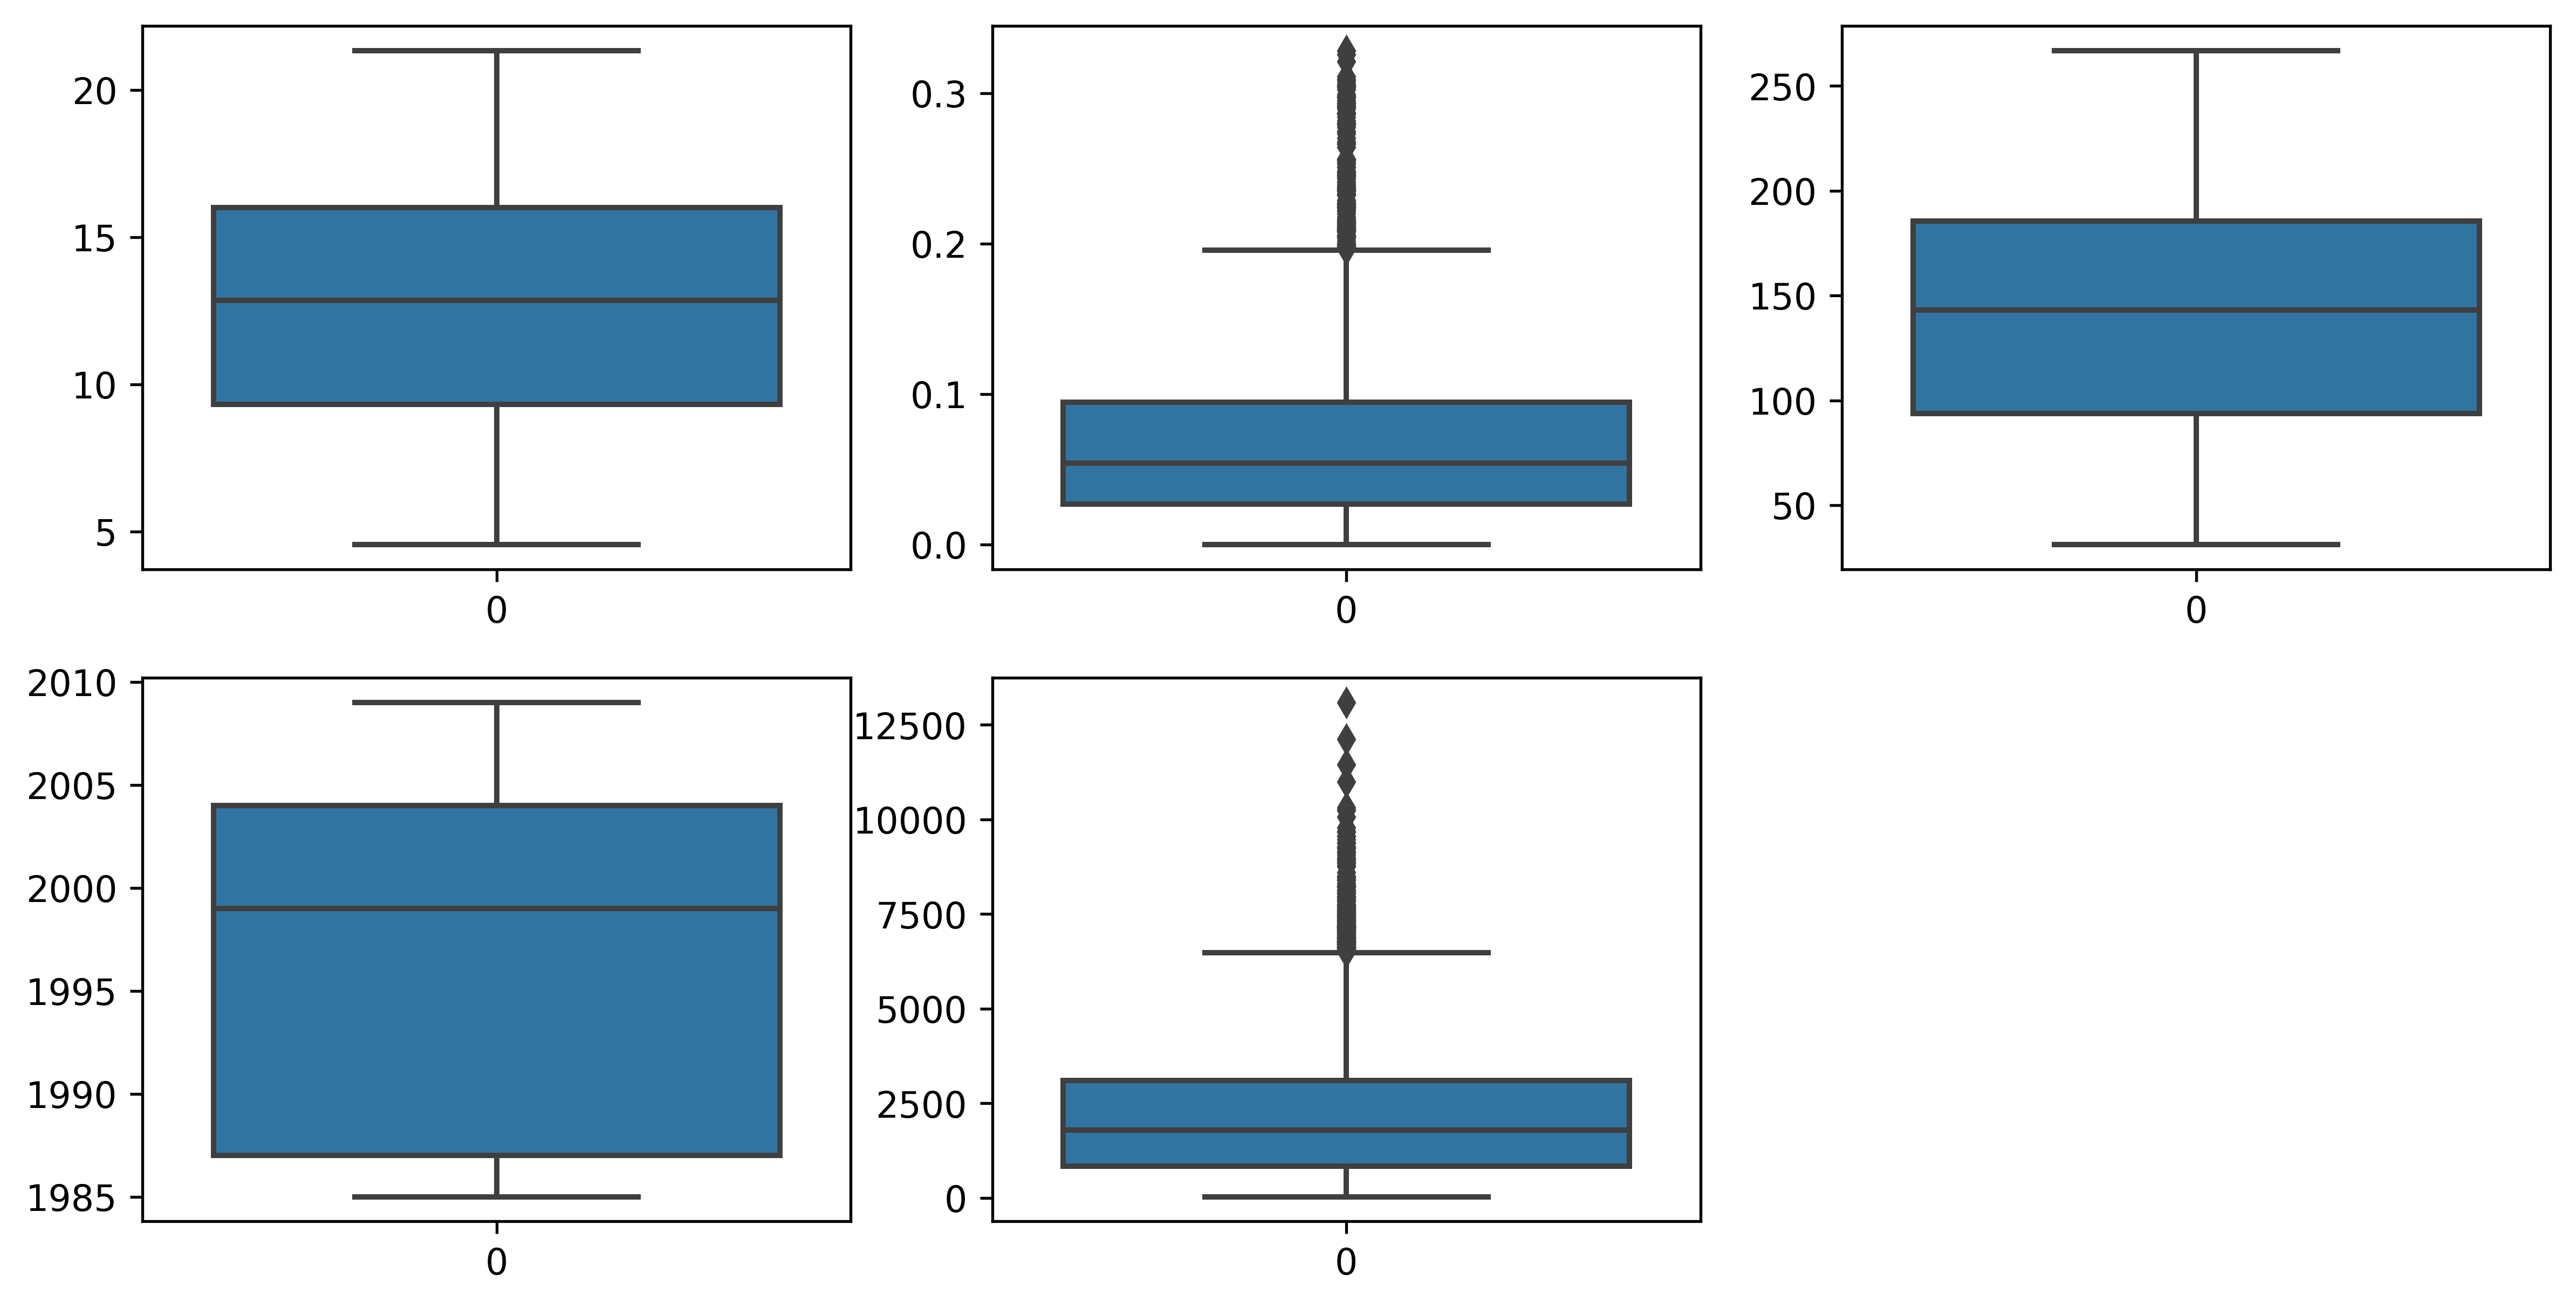

In [ ]:
# detecting for outliers
plt.figure(figsize = (12, 6), dpi = 480)

plt.subplot(2,3,1)
sns.boxplot(dataset['Item_Weight'])

plt.subplot(2,3,2)
sns.boxplot(dataset['Item_Visibility'])

plt.subplot(2,3,3)
sns.boxplot(dataset['Item_MRP'])

plt.subplot(2,3,4)
sns.boxplot(dataset['Outlet_Establishment_Year'])

plt.subplot(2,3,5)
sns.boxplot(dataset['Item_Outlet_Sales'])

Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

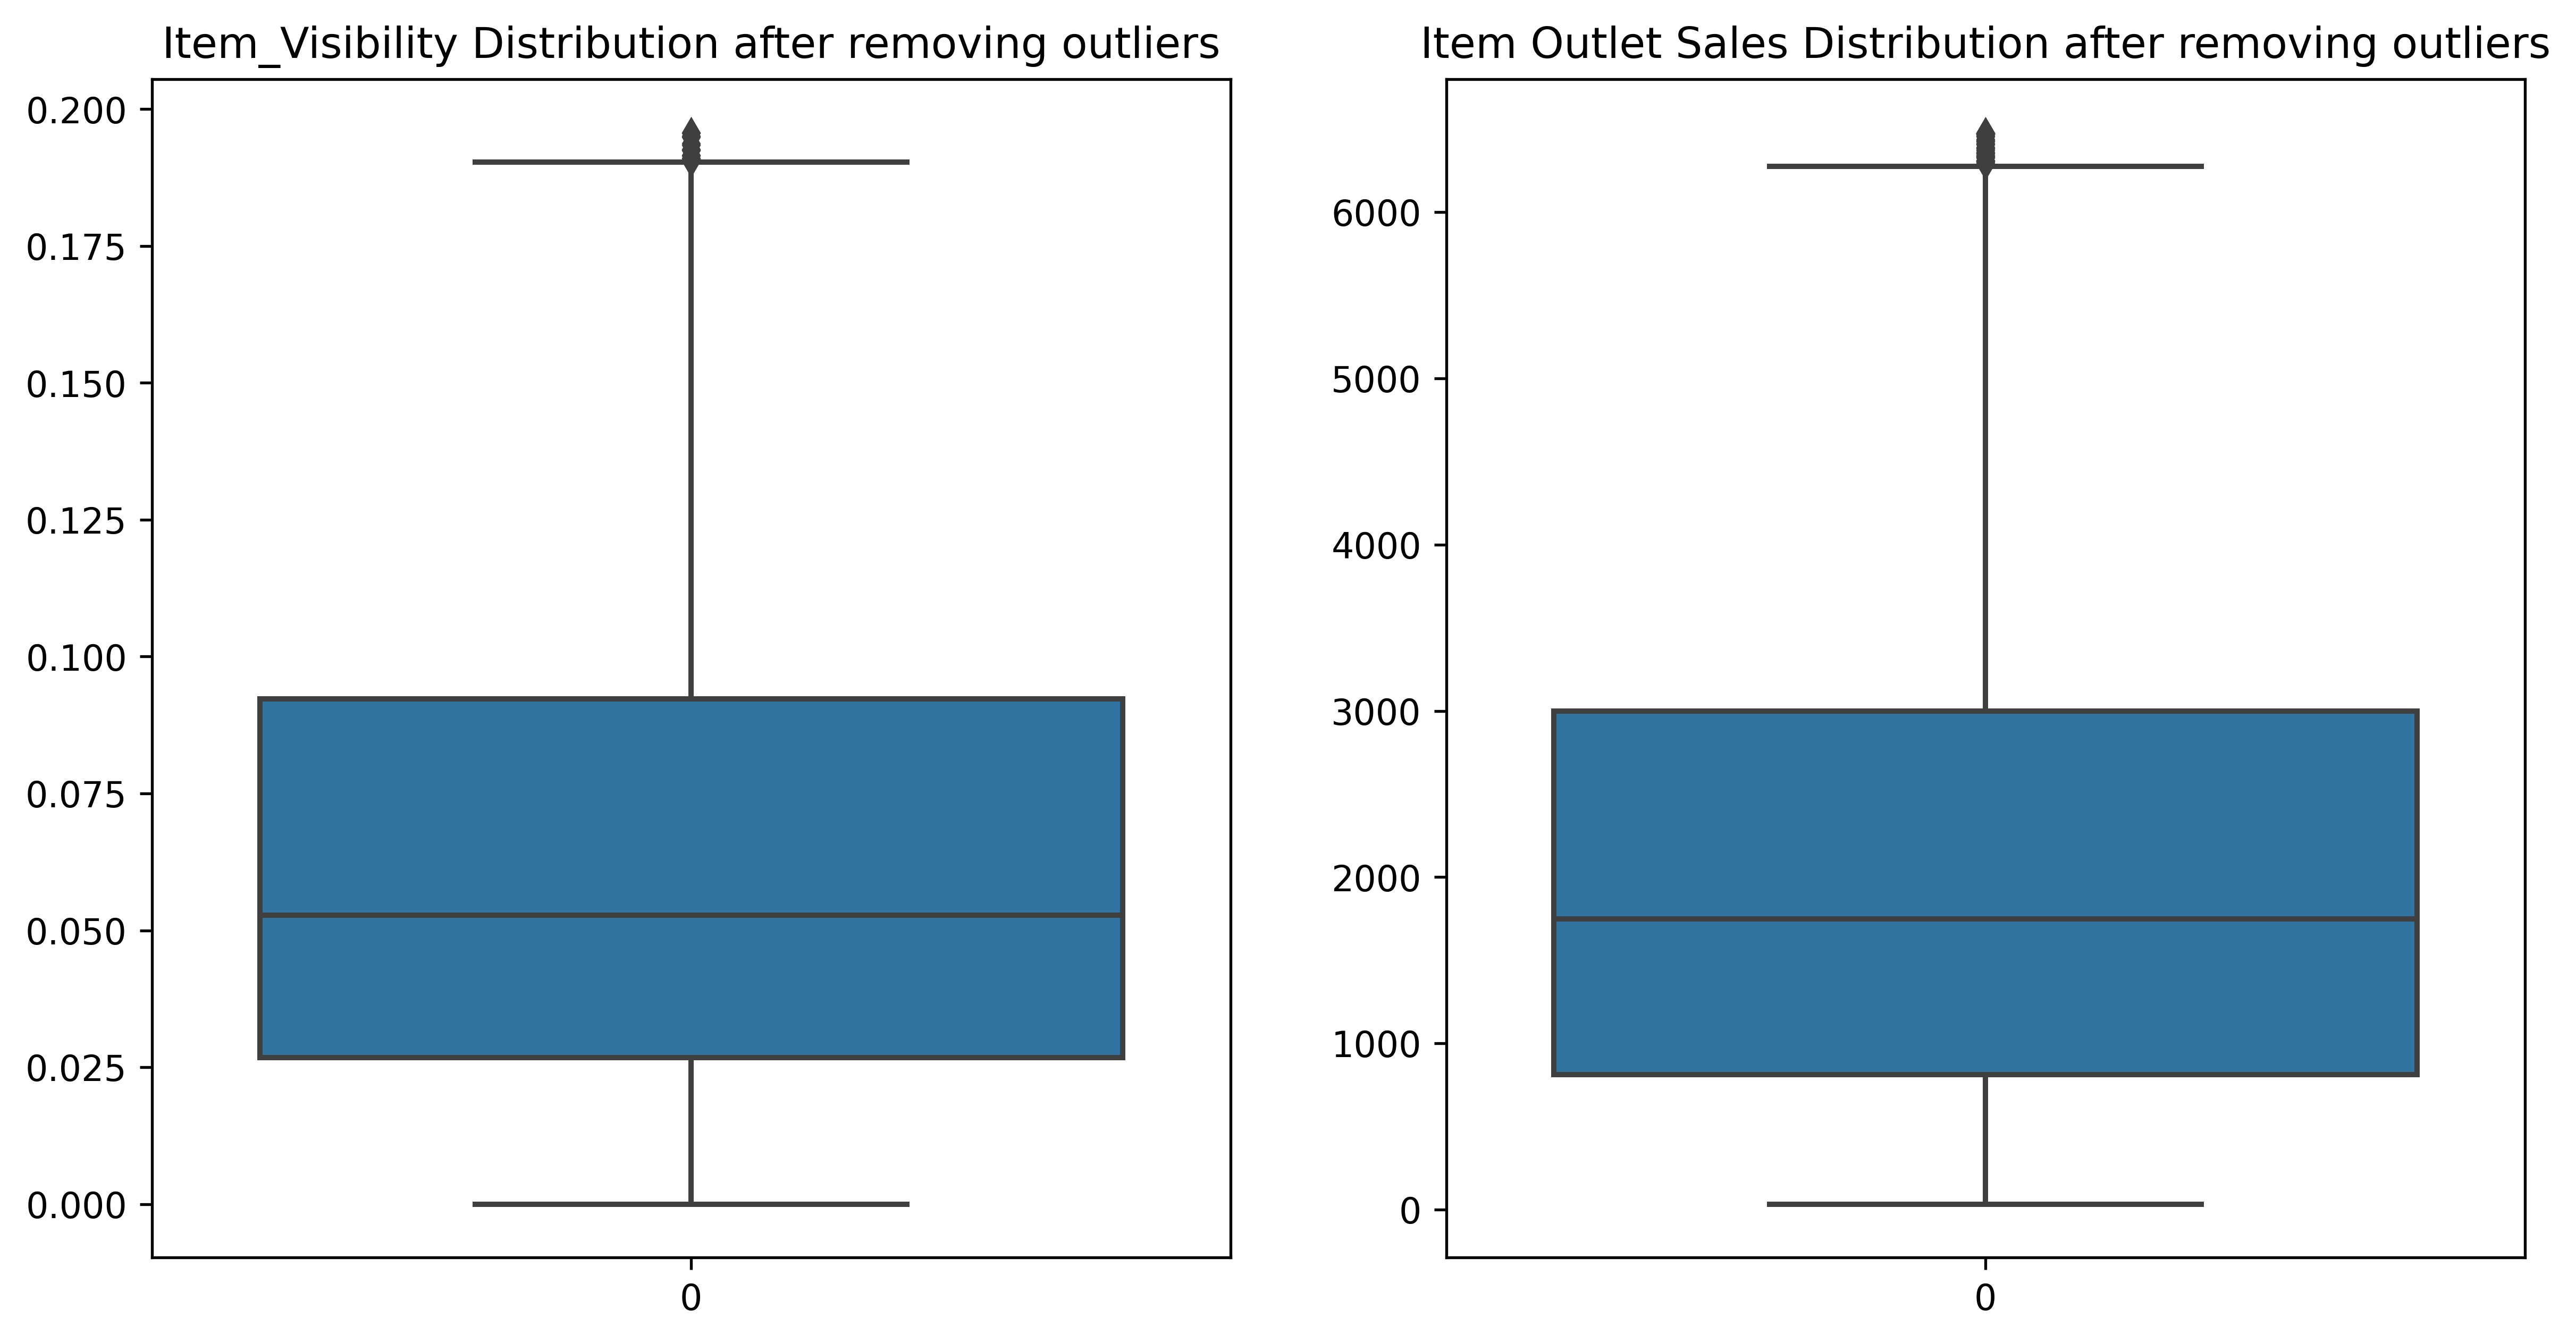

In [ ]:
# removing ouliers
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper_v, lower_v = outliers(dataset, "Item_Visibility")
upper_o, lower_o = outliers(dataset, "Item_Outlet_Sales")

dataset_vis = dataset[(dataset['Item_Visibility'] > lower_v) & (dataset['Item_Visibility'] < upper_v)]
dataset_sal = dataset[(dataset['Item_Outlet_Sales'] > lower_o) & (dataset['Item_Outlet_Sales'] < upper_o)]

plt.figure(figsize = (12, 6), dpi = 480)

plt.subplot(1,2,1)
sns.boxplot(dataset_vis['Item_Visibility'])
plt.title('Item_Visibility Distribution after removing outliers')

plt.subplot(1,2,2)
sns.boxplot(dataset_sal['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution after removing outliers')

## Encoding categorical data

In [ ]:
cat_col = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Item_Type']
data_encoded = pd.get_dummies(dataset, columns = cat_col)

data_encoded.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_low fat,Item_Fat_Content_regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


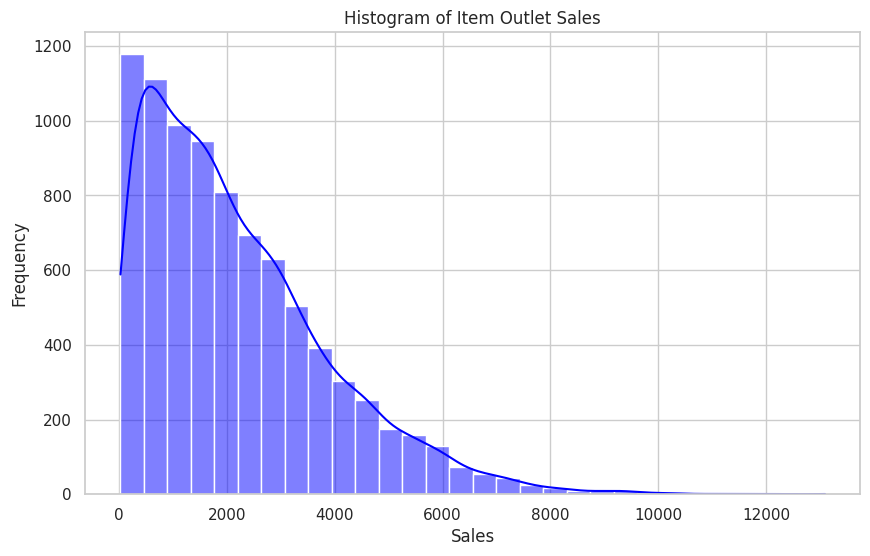

In [ ]:
sns.set(style="whitegrid")

# Create a histogram for sales
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Item_Outlet_Sales'], bins=30, kde=True, color='blue')
plt.title('Histogram of Item Outlet Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Correlation with categorical Variables

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'dataset' is your DataFrame containing the data
# and 'Item_Outlet_Sales' is the target variable

# Define a formula for the ANOVA model
formula = 'Item_Outlet_Sales ~ C(Item_Fat_Content) + C(Item_Type) + C(Outlet_Size) + C(Outlet_Location_Type) + C(Outlet_Type)'

# Fit the ANOVA model
model = ols(formula, data=dataset).fit()
model
# Print the ANOVA table
print(sm.stats.anova_lm(model, typ=2))


                               sum_sq      df           F         PR(>F)
C(Item_Fat_Content)      1.217590e+06     1.0    0.511484   4.745246e-01
C(Item_Type)             9.033286e+07    15.0    2.529796   9.432107e-04
C(Outlet_Size)           1.266783e+09     2.0  266.074589  1.651288e-111
C(Outlet_Location_Type)  9.713129e+08     2.0  204.014113   1.736616e-86
C(Outlet_Type)           2.622380e+09     3.0  367.202295  3.250621e-219
Residual                 1.449727e+10  6090.0         NaN            NaN


## Normalizing

In [ ]:
# Data inputs
X = data_encoded.drop(['Item_Outlet_Sales'], axis = 1)
copy_x = X
# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Data outputs
y = data_encoded['Item_Outlet_Sales']
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_low fat,Item_Fat_Content_regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0.016047,249.8092,1999,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.920,0.019278,48.2692,2009,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0.016760,141.6180,1999,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,19.200,0.000000,182.0950,1998,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,0.046982,108.1570,2002,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0.035186,85.1224,2004,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,0.145221,103.1332,2009,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)

X.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.841872,-0.970732,1.747454,0.139541,0.738147,-0.738147,-0.350395,1.432326,-0.623893,1.602840,...,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935
1,-1.641706,-0.908111,-1.489023,1.334103,-1.354743,1.354743,-0.350395,1.432326,-0.623893,-0.623893,...,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,4.260611,-0.132935
2,1.098554,-0.956917,0.010040,0.139541,0.738147,-0.738147,-0.350395,1.432326,-0.623893,1.602840,...,-0.411066,-0.160484,-0.254903,-0.345735,4.365102,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935
3,1.500838,-1.281758,0.660050,0.020085,-1.354743,1.354743,-0.350395,-0.698165,-0.623893,-0.623893,...,2.432698,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935
4,-0.929428,-1.281758,-1.399220,-1.293934,0.738147,-0.738147,2.853918,-0.698165,-0.623893,-0.623893,...,-0.411066,-0.160484,-0.254903,2.892392,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935


### Data Spliting

In [ ]:
# splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6818, 32) (1705, 32) (6818,) (1705,)


# Feature Selection

<ipython-input-26-739f897ef1a5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot = True, cmap = "crest", linewidths = 0.5, linecolor = 'black')


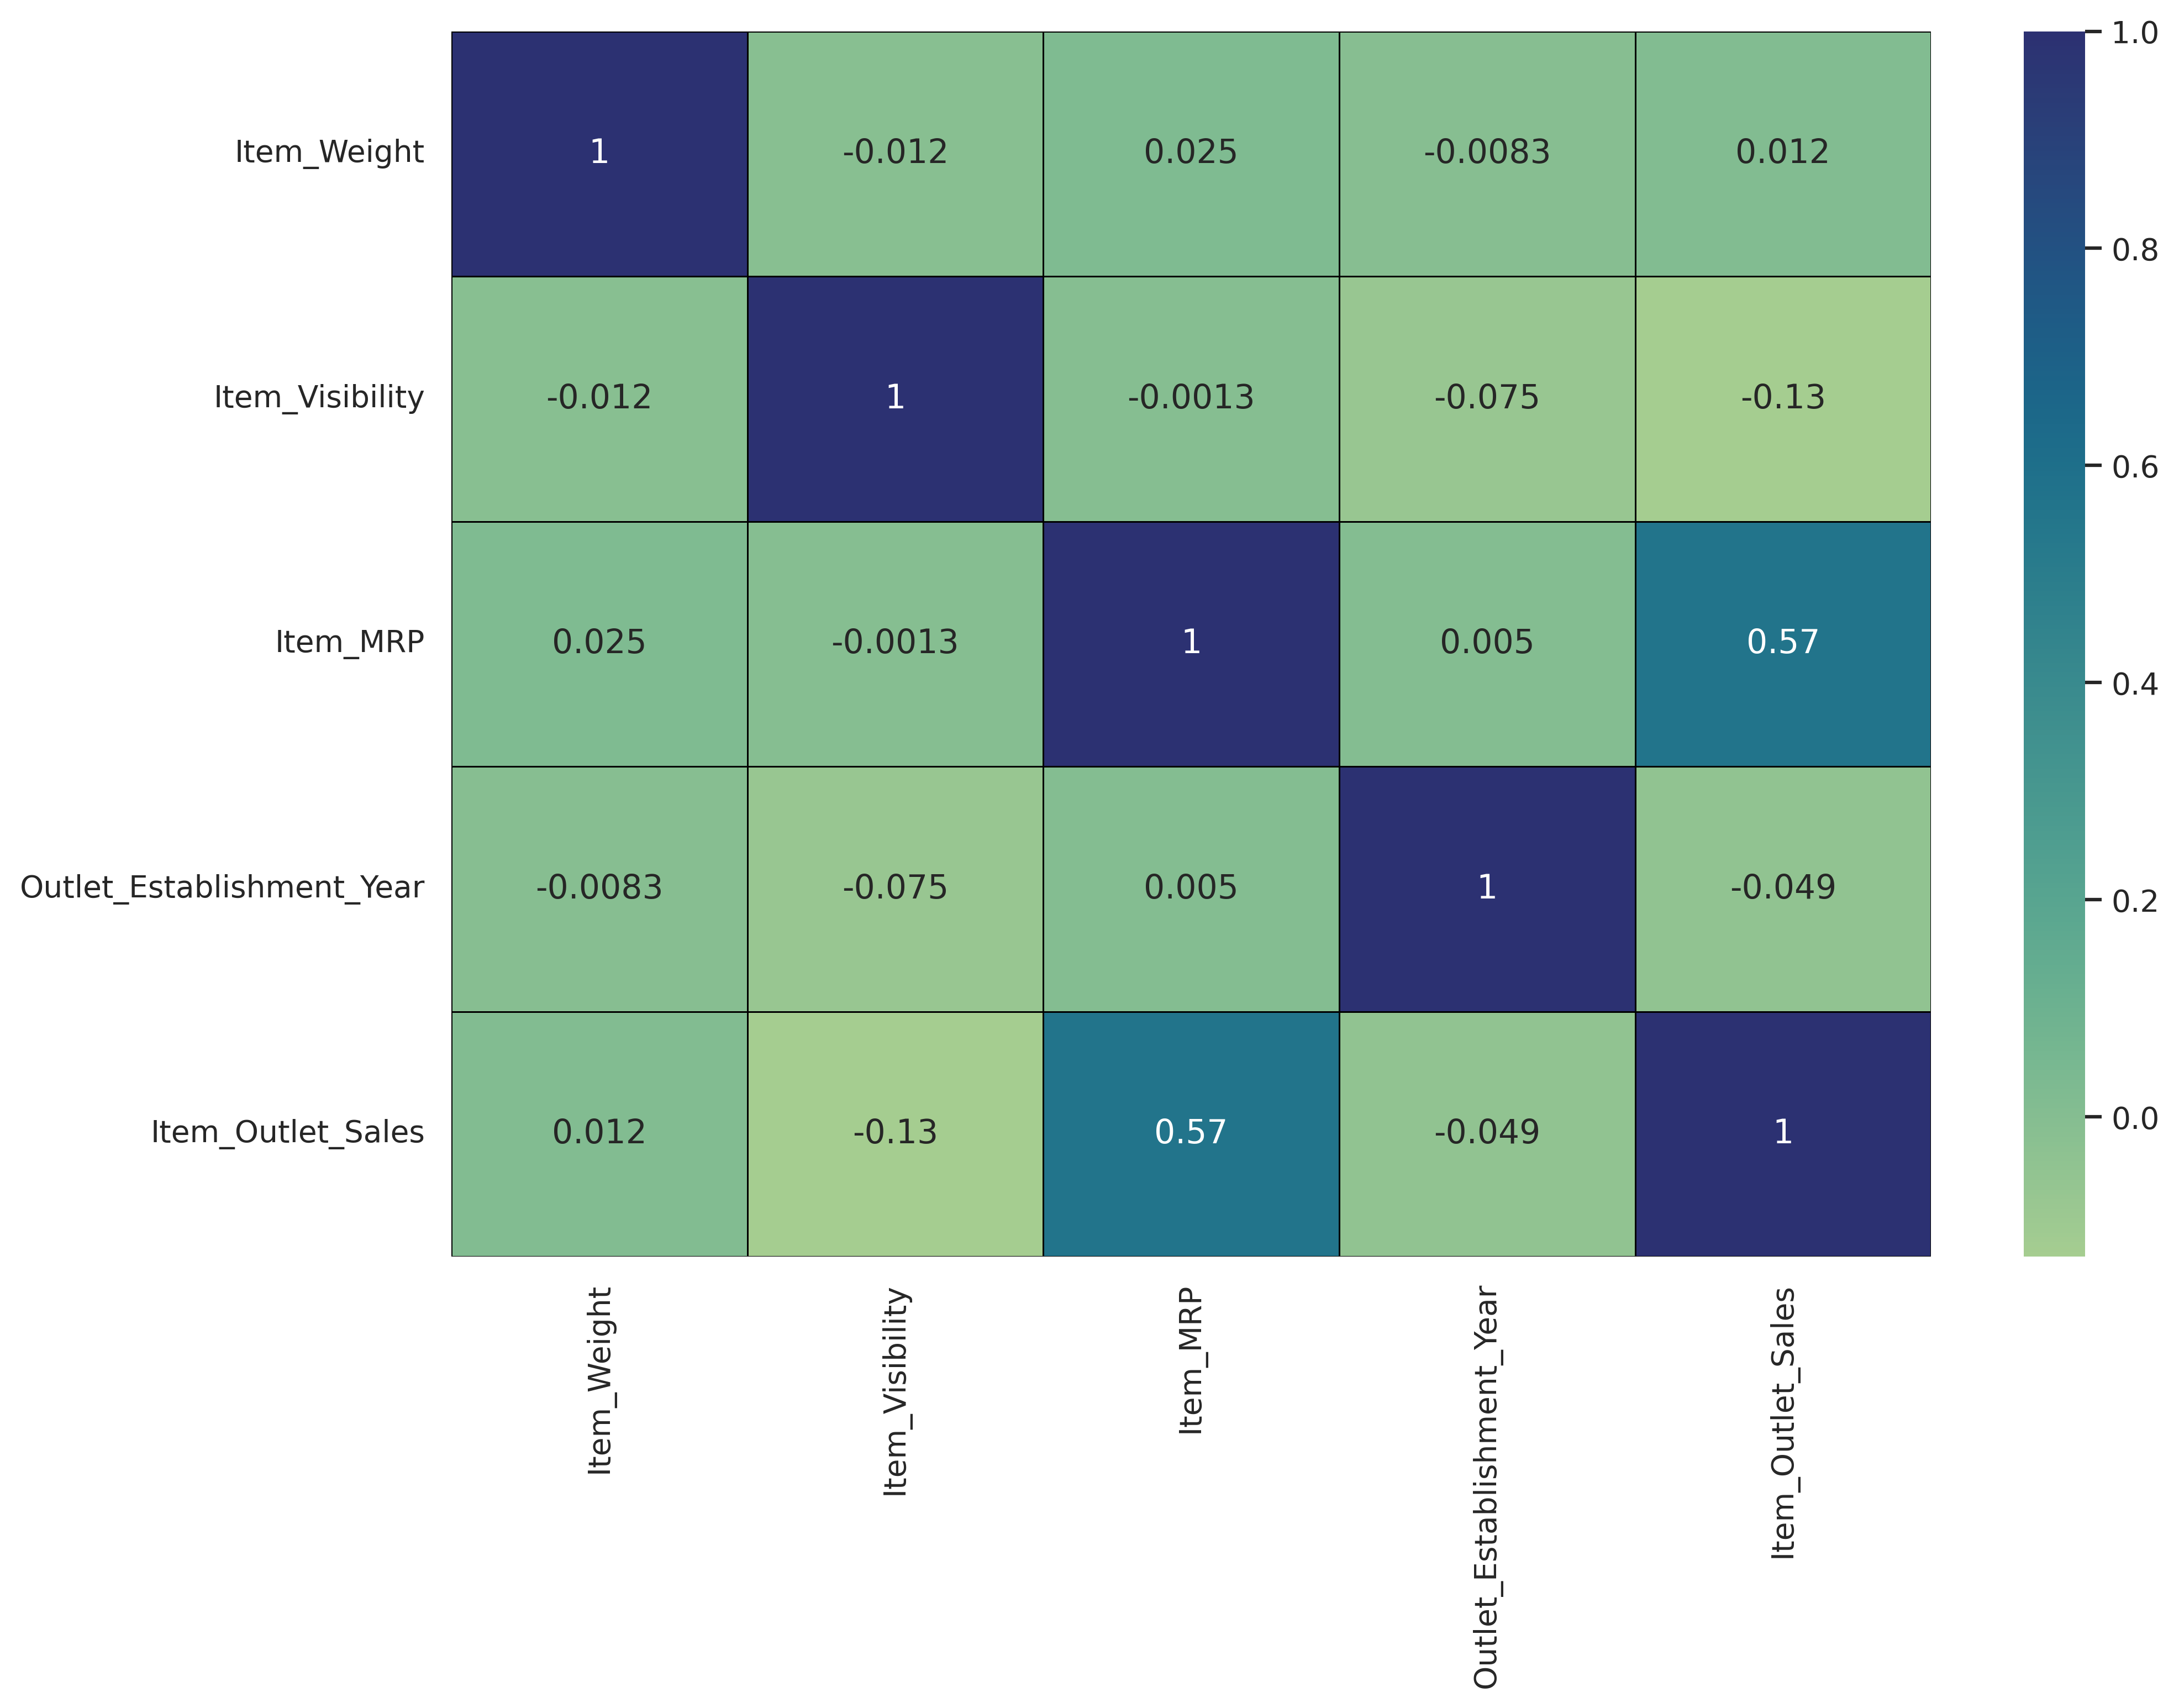

In [ ]:
# Correlation Analysis
plt.figure(figsize = (12, 8), dpi = 360)
sns.heatmap(dataset.corr(), annot = True, cmap = "crest", linewidths = 0.5, linecolor = 'black')
plt.show()

## Feature Importance

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
549,-0.794544,-0.599405,0.487415,0.139541,-1.354743,1.354743,-0.350395,1.432326,-0.623893,1.602840,...,2.432698,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935
7757,1.216873,-0.361643,0.474526,0.497909,0.738147,-0.738147,-0.350395,-0.698165,-0.623893,-0.623893,...,-0.411066,-0.160484,-0.254903,2.892392,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935
764,1.122218,0.193620,-0.470081,-0.099372,-1.354743,1.354743,-0.350395,-0.698165,1.602840,1.602840,...,-0.411066,-0.160484,-0.254903,-0.345735,4.365102,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935
6867,-1.072593,-0.703303,-1.595901,0.497909,0.738147,-0.738147,-0.350395,-0.698165,-0.623893,-0.623893,...,2.432698,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935
2716,-0.001809,1.377965,0.233979,-0.099372,0.738147,-0.738147,-0.350395,-0.698165,1.602840,1.602840,...,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,2.470324,-0.234708,-0.132935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.819391,4.268121,-0.029050,0.020085,-1.354743,1.354743,-0.350395,-0.698165,-0.623893,-0.623893,...,2.432698,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935
5191,0.648944,0.997049,-1.049049,1.095190,0.738147,-0.738147,-0.350395,-0.698165,-0.623893,-0.623893,...,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935
5390,1.122218,-0.914595,1.547519,0.497909,0.738147,-0.738147,-0.350395,-0.698165,-0.623893,-0.623893,...,-0.411066,-0.160484,3.923058,-0.345735,-0.229090,-0.142232,-0.086982,-0.404805,-0.234708,-0.132935
860,1.772971,-0.228111,-0.370092,1.095190,0.738147,-0.738147,-0.350395,-0.698165,-0.623893,-0.623893,...,-0.411066,-0.160484,-0.254903,-0.345735,-0.229090,-0.142232,-0.086982,2.470324,-0.234708,-0.132935


# Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

## Linear Regression

In [ ]:
# create and fit the Linear Regression model
lr_model = LinearRegression()

# fitting the model
lr_model.fit(X_train, y_train)

# predict
pred_lr = lr_model.predict(X_test)

# calculate and display regression metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))
rscore_lr = r2_score(y_test, pred_lr)

print("r2_score: ", rscore_lr)
print("RMSE: ", rmse_lr)
print("MAE: ", mean_absolute_error(y_test, pred_lr))

r2_score:  0.5793792269143474
RMSE:  1069.2215255240556
MAE:  791.8347251203975


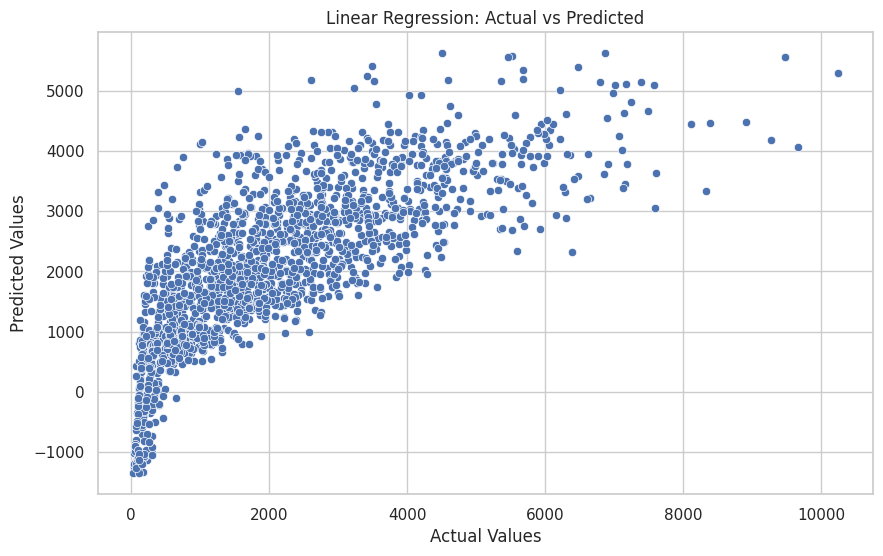

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=pred_lr)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


We can see that the model predicts that some items will do well because they have high sales in the year and this trend is linear.

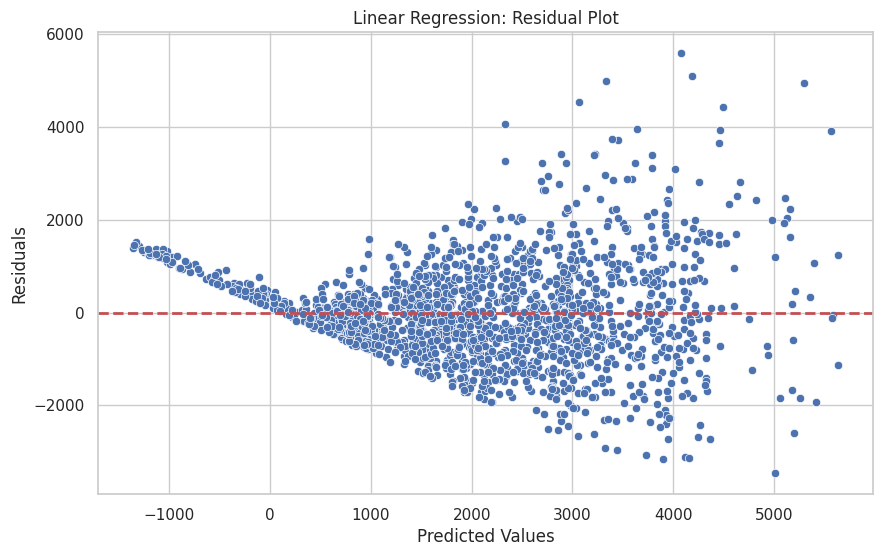

In [ ]:
# Residual plot
residuals = y_test - pred_lr

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pred_lr, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title("Linear Regression: Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


There seems to be a pattern in the residual plot that iindicates that linear regression may not be the best model as the relationship between the sales and the predictors is not linear.

s can  be seen below the model is not very doing well. The accuracy is just about 57.9%

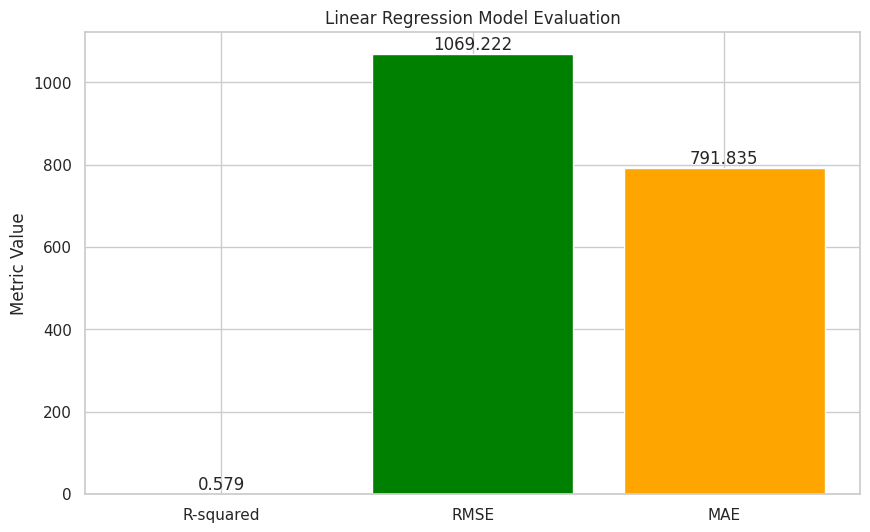

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have calculated rscore_lr, rmse_lr, and mae_lr from your Linear Regression model

# List of metric names
metrics = ['R-squared', 'RMSE', 'MAE']

# Corresponding values
values = [rscore_lr, rmse_lr, mean_absolute_error(y_test, pred_lr)]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title('Linear Regression Model Evaluation')
plt.ylabel('Metric Value')

# Adding the values on top of the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.show()


## Random Forest

In [ ]:
# initialize a Random Forest model
rf_model = RandomForestRegressor()

# train the model using the training data
rf_model.fit(X_train, y_train)

# predict the target variable for the test data
pred_rf = rf_model.predict(X_test)

# evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
rscore_rf = r2_score(y_test, pred_rf)

print("r2_score: ", rscore_rf)
print("RMSE: ", rmse_rf)
print("MAE: ", mean_absolute_error(y_test, pred_rf))

r2_score:  0.5568835080334715
RMSE:  1097.4412791531188
MAE:  765.3528214709678


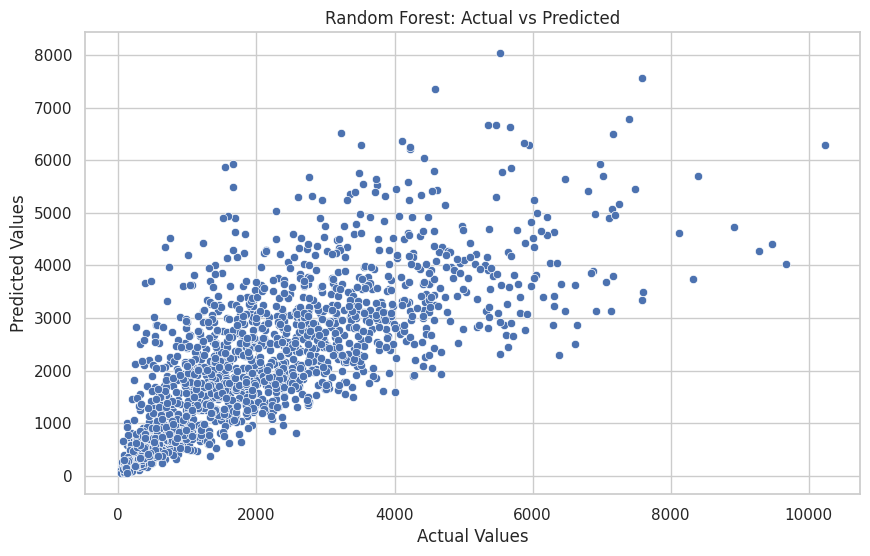

In [ ]:
# Scatter plot of actual vs predicted values for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=pred_rf)
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


The model general makes higher preditions for higher values of sales

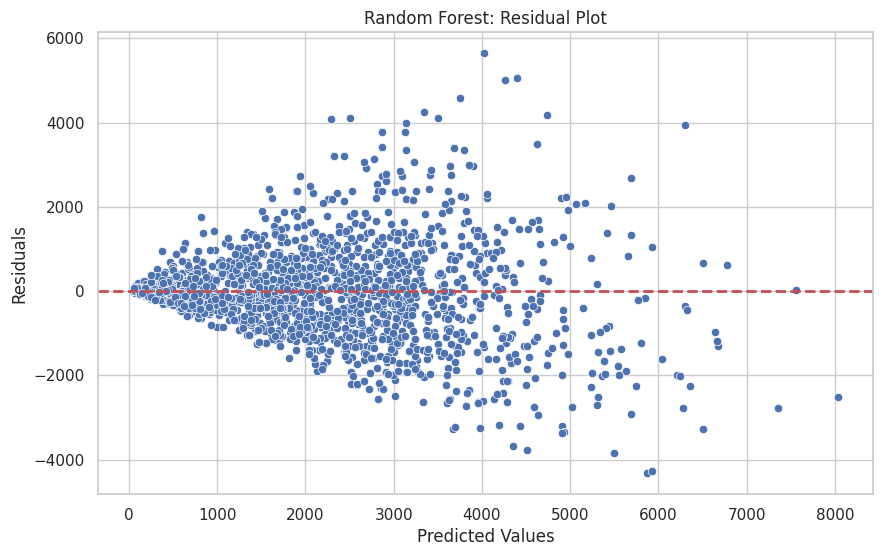

In [ ]:
# Residual plot for Random Forest
residuals_rf = y_test - pred_rf

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pred_rf, y=residuals_rf)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title("Random Forest: Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


The errors increase as the values of sales increases.

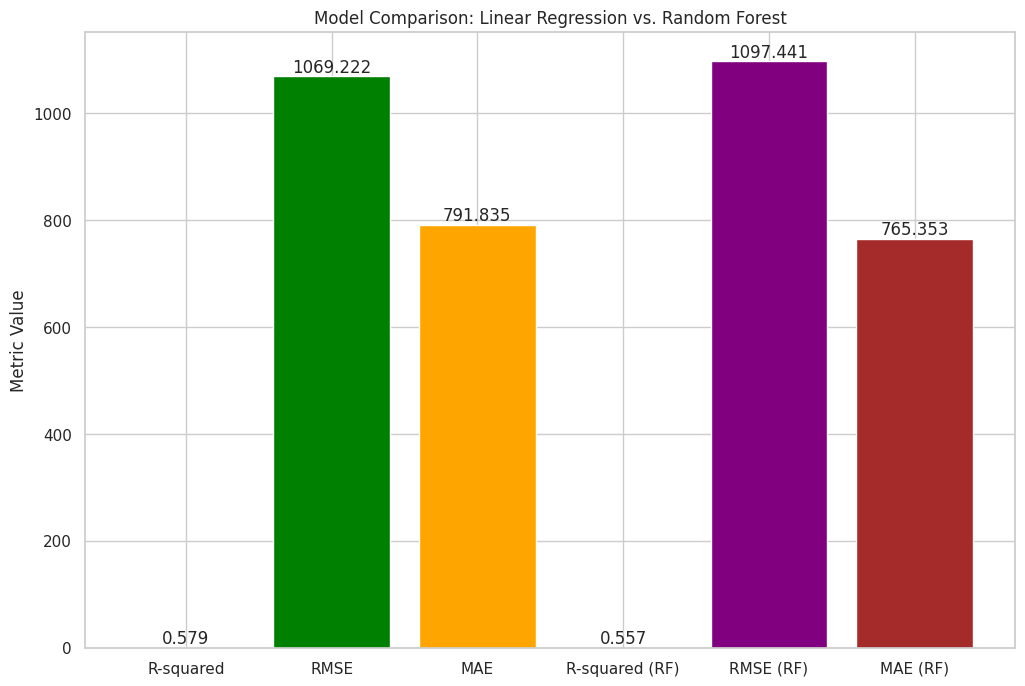

In [ ]:
# List of metric names
metrics_rf = ['R-squared (RF)', 'RMSE (RF)', 'MAE (RF)']

# Corresponding values
values_rf = [rscore_rf, rmse_rf, mean_absolute_error(y_test, pred_rf)]

# Combine metrics from Linear Regression and Random Forest for comparison
metrics_combined = metrics + metrics_rf
values_combined = values + values_rf

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(metrics_combined, values_combined, color=['blue', 'green', 'orange', 'red', 'purple', 'brown'])
plt.title('Model Comparison: Linear Regression vs. Random Forest')
plt.ylabel('Metric Value')

# Adding the values on top of the bars
for i, value in enumerate(values_combined):
    plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom')

plt.show()


## Decision Tree

In [ ]:
# initialize a Decision Tree model
dt_model = DecisionTreeRegressor(max_depth = 5)

# train the model using the training data
dt_model.fit(X_train, y_train)

# predict the target variable for the test data
pred_dt = dt_model.predict(X_test)

# evaluate the model
rmse_dt = np.sqrt(mean_squared_error(y_test, pred_dt))
rscore_dt = r2_score(y_test, pred_dt)

print("r2_score: ", rscore_dt)
print("RMSE: ", rmse_dt)
print("MAE: ", mean_absolute_error(y_test, pred_dt))

r2_score:  0.611389606945774
RMSE:  1027.7311982700267
MAE:  721.6447426931057


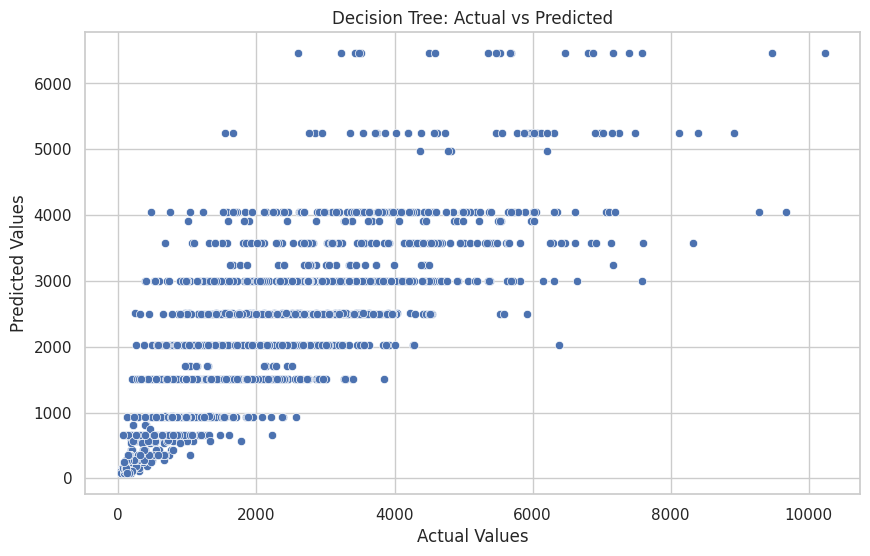

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values for Decision Tree
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=pred_dt)
plt.title("Decision Tree: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


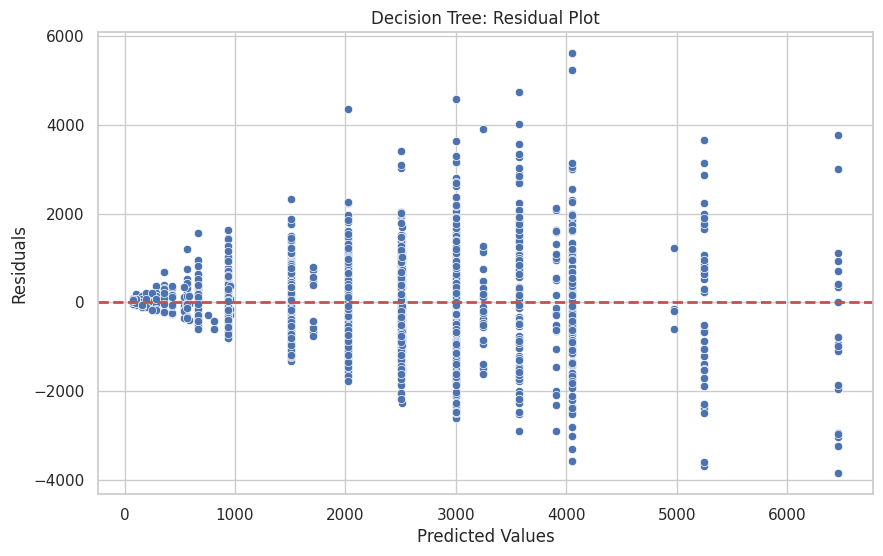

In [ ]:
# Residual plot for Decision Tree
residuals_dt = y_test - pred_dt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pred_dt, y=residuals_dt)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title("Decision Tree: Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


In [ ]:
# comparing all the models
models = pd.DataFrame({'Model' : ['Linear Regression', 'Random Forest', 'Decision Tree'],
                        'R2_Score' : [rscore_lr, rscore_rf, rscore_dt],
                        'RMSE' : [rmse_lr, rmse_rf, rmse_dt]})

models.sort_values(by = 'R2_Score', ascending = False)

,Model,R2_Score,RMSE
2,Decision Tree,0.611390,1027.731198
0,Linear Regression,0.579379,1069.221526
1,Random Forest,0.556884,1097.441279


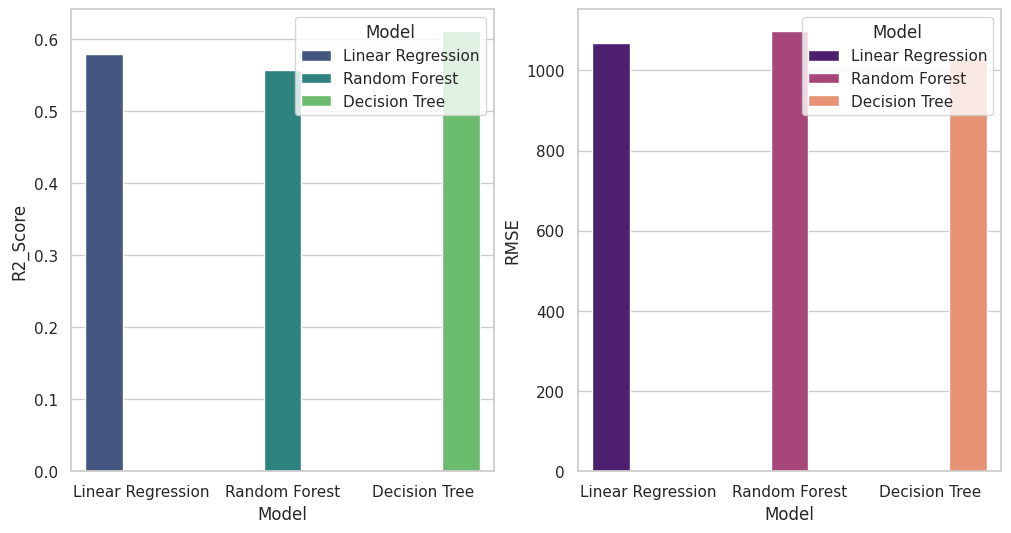

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'models'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First subplot
sns.barplot(x='Model', y='R2_Score', hue='Model', data=models, palette='viridis', ax=axes[0])

# Second subplot
sns.barplot(x='Model', y='RMSE', hue='Model', data=models, palette='magma', ax=axes[1])

plt.show()


# Cross Validation


### Linear Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Create a cross-validation object with desired number of folds
num_folds = 5
cross_validation = KFold(n_splits = num_folds, shuffle = True)

# Perform cross-validation
cross_val_scores = cross_val_score(lr_model, X, y, cv = cross_validation, scoring = 'r2')

# Print the cross-validation scores
print("Cross-Validation Scores_LR: ", cross_val_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean of Cross-Validation Scores: ", cross_val_scores.mean())
print("Standard Deviation of Cross-Validation Scores: ", cross_val_scores.std())

Cross-Validation Scores_LR:  [0.55838285 0.57887851 0.55722432 0.53888439 0.56670427]
Mean of Cross-Validation Scores:  0.5600148678397623
Standard Deviation of Cross-Validation Scores:  0.013096053129897107


### Random Forest

In [ ]:
# Create a cross-validation object with desired number of folds
cross_validation = KFold(n_splits = 5, shuffle = True)

# Perform cross-validation
cross_val_scores = cross_val_score(rf_model, X, y, cv = cross_validation, scoring = 'r2')

# Print the cross-validation scores
print("Cross-Validation Scores_RF: ", cross_val_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean of Cross-Validation Scores: ", cross_val_scores.mean())
print("Standard Deviation of Cross-Validation Scores: ", cross_val_scores.std())

Cross-Validation Scores_RF:  [0.53658748 0.57967949 0.50458017 0.58531894 0.53025335]
Mean of Cross-Validation Scores:  0.5472838877470516
Standard Deviation of Cross-Validation Scores:  0.03073825065787503


### Decision Tree

In [ ]:
# Create a cross-validation object with desired number of folds
cross_validation = KFold(n_splits = 5, shuffle = True)

# Perform cross-validation
cross_val_scores = cross_val_score(dt_model, X, y, cv = cross_validation, scoring = 'r2')

# Print the cross-validation scores
print("Cross-Validation Scores_DT: ", cross_val_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean of Cross-Validation Scores: ", cross_val_scores.mean())
print("Standard Deviation of Cross-Validation Scores: ", cross_val_scores.std())

Cross-Validation Scores_DT:  [0.58732718 0.58250085 0.57601805 0.60500844 0.61034797]
Mean of Cross-Validation Scores:  0.5922404964811084
Standard Deviation of Cross-Validation Scores:  0.013214160873125554


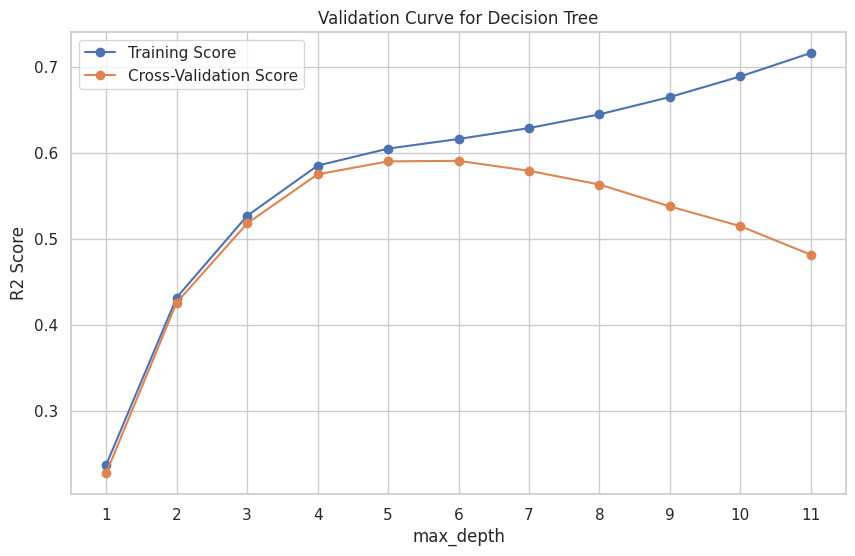

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
112000 fits failed out of a total of 252000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600,

Best Parameters:  {'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 90, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.1, 'splitter': 'random'}
Best Score:  0.49401210618945307


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

# Assuming X and y are your feature matrix and target variable

# Create a decision tree model
dt_model = DecisionTreeRegressor()

# Define the range of parameter values to tune
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# Perform cross-validation for different values of the 'max_depth' parameter
train_scores, test_scores = validation_curve(
    dt_model, X, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring="r2", n_jobs=-1
)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training Score", marker='o')
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-Validation Score", marker='o')
plt.title("Validation Curve for Decision Tree")
plt.xlabel("max_depth")
plt.ylabel("R2 Score")
plt.xticks(param_range)
plt.legend()
plt.show()

# Create a cross-validation object with desired number of folds
cross_validation = KFold(n_splits=5, shuffle=True)

# Perform grid search
grid_search = GridSearchCV(dt_model, param_grid=parameters, scoring='r2', cv=cross_validation, n_jobs=3)
grid_search.fit(X, y)

# Print the best parameters and corresponding score from grid search
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)